# Project 2

In the coding project below, answer any bolded questions on Canvas via the assigment named Programming Project 2 Quiz Questions.

In the following exercise, we will perform exploratory data analysis (EDA) to extract insights using Python. This assignment continues off of the previous assignment (Project 1). If you wish, you may copy and paste your previous code into this notebook.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please uncomment and try the following lines; if they do not work, please try running them in the terminal without the `!` sign! (e.g. `pip install sklearn --user`

In [1]:
# %%capture
# !pip install penngrader --user
# !pip install seaborn --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [2]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 20319687                         # 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Carlos Carrillo-Calderon"     # FULL NAME GOES HERE

In [3]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW2', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 20319687

Make sure this correct or we will not be able to store your grade


In [4]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import seaborn as sns

# Suppress FutureWarning:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Plotting
import matplotlib.pyplot as plt

%matplotlib inline

## Part A

First, we return to the College dataset. This dataset contains the following variables from 777 different universities and colleges in the US:

| Column | Description | 
|:-|:-|
|Private | Public/private indicator|
|Apps | Number of applications received|
|Accept | Number of applicants accepted|
|Enroll | Number of new students enrolled|
|Top10perc | New students from top 10\% of high school class|
|Top25perc | New students from top 25\% of high school class|
|F.Undergrad | Number of full-time undergraduates|
|P.Undergrad | Number of part-time undergraduates|
|Outstate | Out-of-state tuition|
|Room.Board | Room and board costs|
|Books | Estimated book costs|
|Personal | Estimated personal spending|
|PhD | Percent of faculty with Ph.D.’s|
|Terminal | Percent of faculty with terminal degree|
|S.F.Ratio | Student/faculty ratio|
|Perc.alumni | Percent of alumni who donate|
|Expend | Instructional expenditure per student|
|Grad.Rate | Graduation rate|

In [5]:
college = pd.read_csv('College.csv').copy()
college = college.rename(columns = {'Grad.Rate':'Grad_Rate',
                              'S.F.Ratio': 'S_F_Ratio',
                              'perc.alumni':'perc_alumni',
                              'Room.Board':'Room_Board',
                              'F.Undergrad':'F_Undergrad',
                              'P.Undergrad':'P_Undergrad'})


In [6]:
# college.set_index('Names', inplace = True)
# college.head()

import numpy as np

# Define the dataset
X = np.array([[1, 1, 1],
              [1, 2, 4],
              [1, 3, 9],
              [1, 4, 16]])

Y = np.array([[2],
              [5],
              [13],
              [20]])

# Calculate M^T_X
M_T_X = np.transpose(X)
print("M_T_X:\n", M_T_X)

# Calculate M^T_X * M_X
M_T_X_M_X = np.dot(M_T_X, X)
print("\nM^T_X * M_X:\n", M_T_X_M_X)

# Calculate M^T_X * Y
M_T_X_Y = np.dot(M_T_X, Y)
print("\nM^T_X * Y:\n", M_T_X_Y)

# Calculate the inverse of M^T_X * M_X
inverse_M_T_X_M_X = np.linalg.inv(M_T_X_M_X)
print("\nInverse of (M^T_X * M_X):\n", inverse_M_T_X_M_X)

# Calculate B_hat
B_hat = np.dot(inverse_M_T_X_M_X, M_T_X_Y)
print("\nB_hat:\n", B_hat)

# Extract B_hat0
B_hat_0 = B_hat[0][0]
print("\nB_hat_0: {:.1f}".format(B_hat_0))

# Extract B_hat1
B_hat_1 = B_hat[1][0]
print("\nB_hat_1: {:.1f}".format(B_hat_1))

# Extract B_hat0
B_hat_2 = B_hat[2][0]
print("\nB_hat_2: {:.1f}".format(B_hat_2))


# Given X value
X_value = 2

# Calculate Y_hat
Y_hat = B_hat_0 + B_hat_1 * X_value + B_hat_2 * (X_value ** 2)

print("\nY_hat for X = 2:", Y_hat)



M_T_X:
 [[ 1  1  1  1]
 [ 1  2  3  4]
 [ 1  4  9 16]]

M^T_X * M_X:
 [[  4  10  30]
 [ 10  30 100]
 [ 30 100 354]]

M^T_X * Y:
 [[ 40]
 [131]
 [459]]

Inverse of (M^T_X * M_X):
 [[ 7.75 -6.75  1.25]
 [-6.75  6.45 -1.25]
 [ 1.25 -1.25  0.25]]

B_hat:
 [[-0.5]
 [ 1.2]
 [ 1. ]]

B_hat_0: -0.5

B_hat_1: 1.2

B_hat_2: 1.0

Y_hat for X = 2: 5.900000000000159


1. Use the `seaborn` `pairplot()` function on the original dataframe with all universities to produce a scatterplot matrix of the ﬁrst ten columns of the data. Remember to use the `%matplotlib` inline command for plotting in Jupyter. Comment on your observations.

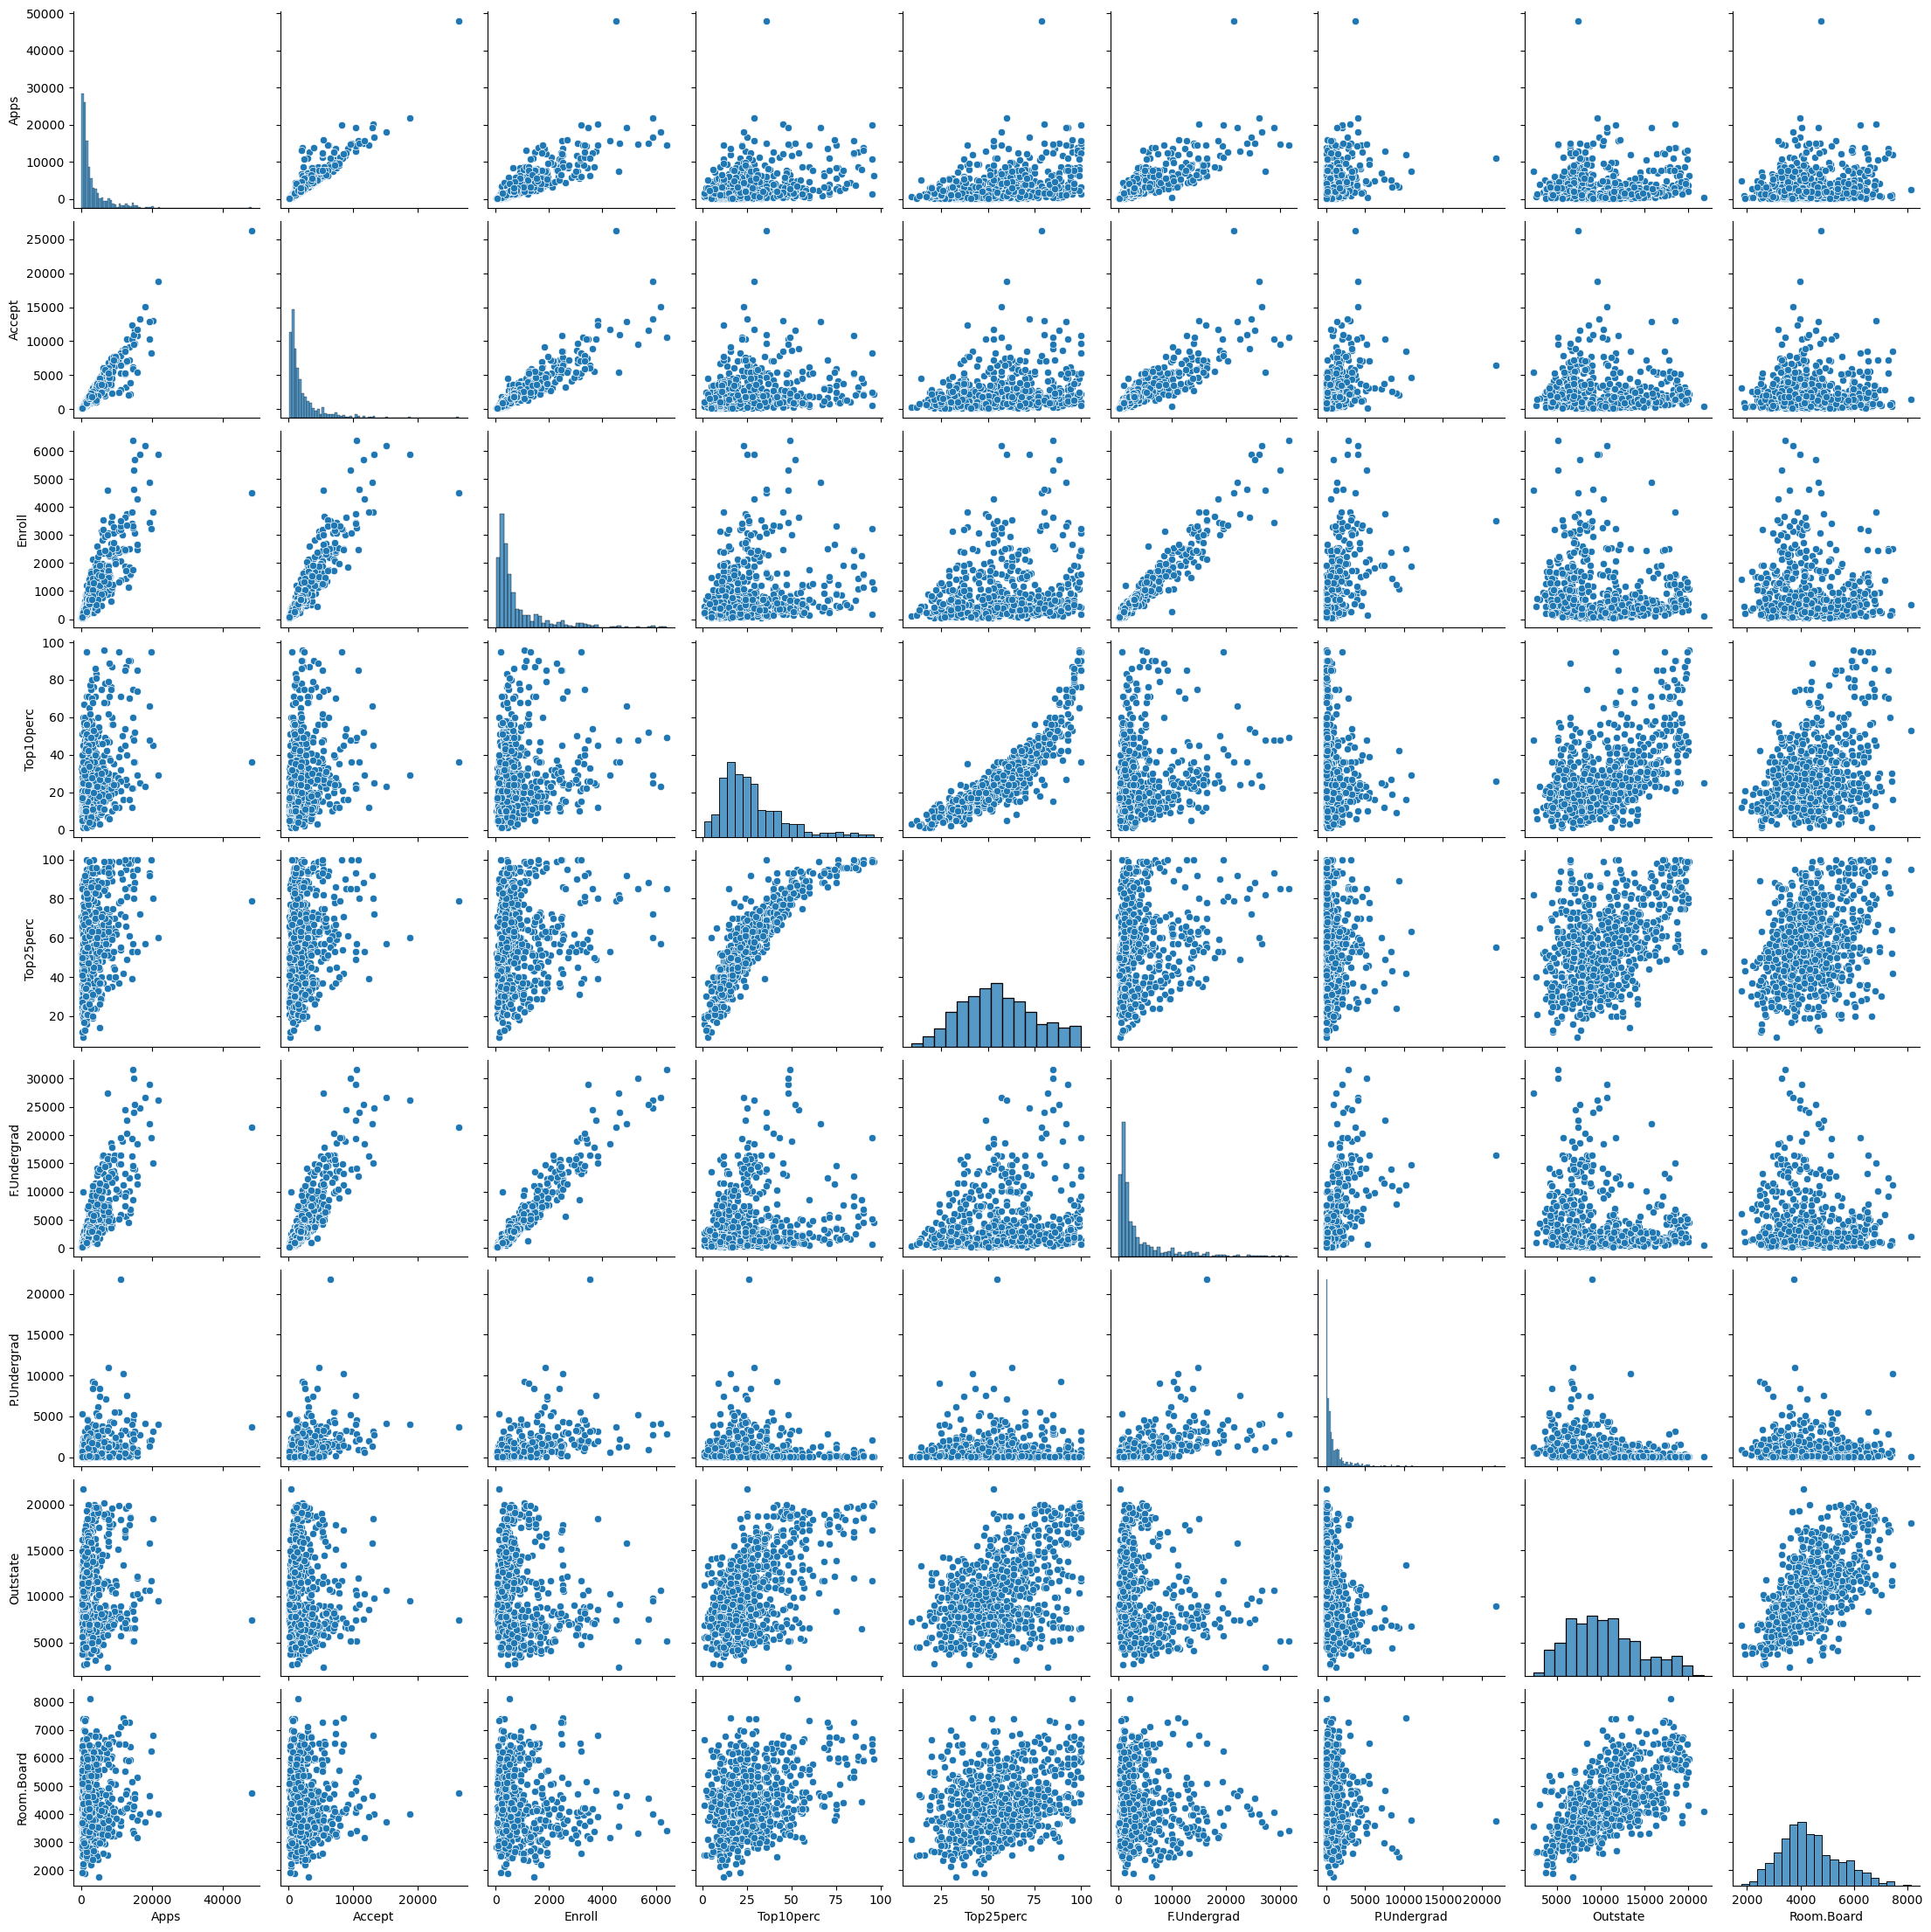

In [7]:
# Load the original dataset into a DataFrame:
df = pd.read_csv('College.csv')

# Select the first ten columns:
first_ten_columns = df.iloc[:, :10]

# Create the pairplot:
sns.pairplot(first_ten_columns)

# Display the plot:
plt.show()


2. Use the `seaborn` `boxplot()` function on the original dataframe with all universities to produce side-by-side box plots of ‘Outstate’ versus ‘Private’. <b>Answer on Canvas: On average, are private universities more expensive than public universities?</b>

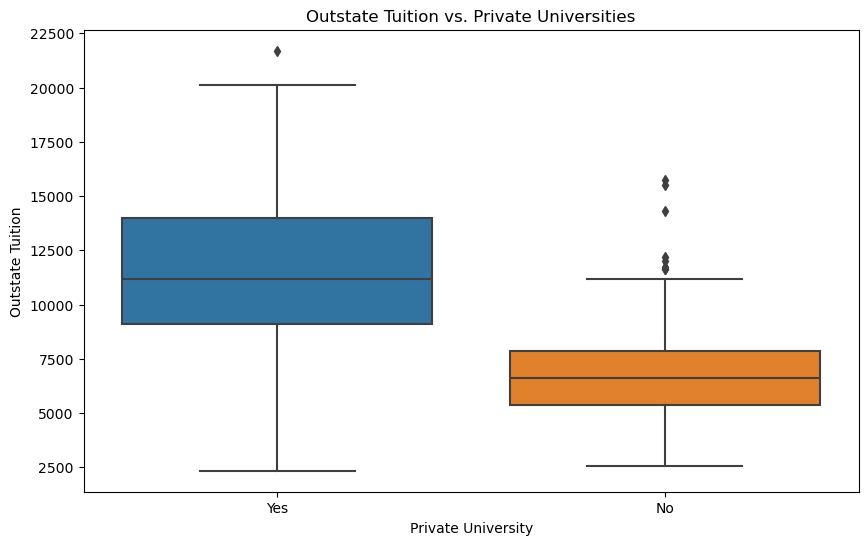

Private universities are more expensive than public universities on average.


In [8]:
# Create actual plot box:
plt.figure(figsize=(10, 6))
sns.boxplot(x = "Private", y = "Outstate", data=df)

# Add title and labels:
plt.title('Outstate Tuition vs. Private Universities')
plt.xlabel('Private University')
plt.ylabel('Outstate Tuition')

# Display plot:
plt.show()

# Group by 'Private' and calculate the mean 'Outstate' tuition for each group
average_tuition = df.groupby('Private')['Outstate'].mean()

# Determine if private universities are more expensive
if average_tuition['Yes'] > average_tuition['No']:
    print("Private universities are more expensive than public universities on average.")
else:
    print("Public universities are more expensive than private universities on average.")

3. Create a new qualitative variable named `large_university` by binning the ‘Enroll’ column. We are going to divide universities into two groups based on whether the number of new students enrolled exceeds the average (mean) of all new students enrolled.  Hint: The variable `large_university` is an indicator variable (a Pandas series that represents a series of booleans, a list is also acceptable). In Python, this is called a "mask," which you can later manipulate to slice your data.

In [9]:
# Calculate the mean of the 'Enroll' column:
mean_enroll = df['Enroll'].mean()

# Create the 'large_university' indicator variable
# based on the mean of the 'Enroll' column above:
large_university = df['Enroll'] > mean_enroll

# Updated and save DataFrame:
df['Large_University'] = large_university

# Display updated DataFrame:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Names,Large_University
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Abilene Christian University,False
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Adelphi University,False
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Adrian College,False
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Agnes Scott College,False
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Alaska Pacific University,False


In [10]:
grader.grade(test_case_id = 'large_university_bin_test', answer = large_university)

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Create a dataframe called `large_universities` that only includes large universities.

In [11]:
# Create a new DataFrame that only includes large universities
large_universities = df[df['Large_University']]
large_universities.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Names,Large_University
19,No,3540,2001,1016,24,54,4190,1512,5130,3592,500,2000,60,62,23.1,5,4010,34,Angelo State University,True
21,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70,Appalachian State University,True
23,No,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48,Arizona State University Main campus,True
25,No,1734,1729,951,12,52,3602,939,3460,2650,450,1000,57,60,19.6,5,4739,48,Arkansas Tech University,True
27,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69,Auburn University-Main Campus,True


5. Use the `pandas` `describe(include = ‘all’)` function on large_universities to produce a numerical summary of each column. Within this dataframe, what is the $75^{th}$ percentile for the column ‘Enroll’? <b>Name this variable `enroll_answer` and enter your answer on Canvas.</b>

In [12]:
# Produce a numerical summary of each column:
description = large_universities.describe(include='all')
description.head(15)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Names,Large_University
count,218,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218,218
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,1
top,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angelo State University,True
freq,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,218
mean,NaN,7233.376147,4734.110092,1897.229358,31.224771,60.298165,9455.123853,1995.334862,9258.600917,4311.839450,581.032110,1661.110092,80.853211,86.481651,15.493578,18.119266,10663.669725,63.963303,NaN,NaN
std,NaN,5069.744625,3186.820612,1124.121061,21.994342,21.117579,5978.291505,2369.873736,4409.338645,1246.859667,173.273615,736.371392,11.160600,10.222508,4.764428,10.702276,7803.519970,18.260494,NaN,NaN
min,NaN,1256.000000,1068.000000,781.000000,3.000000,18.000000,1320.000000,16.000000,2340.000000,1780.000000,96.000000,300.000000,37.000000,43.000000,3.300000,0.000000,3605.000000,10.000000,NaN,NaN
25%,NaN,3943.250000,2686.500000,1058.000000,15.000000,45.000000,5023.250000,658.500000,6197.250000,3413.000000,500.000000,1153.000000,74.000000,81.000000,13.125000,10.000000,6313.500000,52.000000,NaN,NaN
50%,NaN,6003.500000,3752.500000,1548.000000,25.000000,57.500000,7533.500000,1354.500000,7822.000000,4077.500000,599.000000,1583.500000,82.000000,89.000000,16.300000,16.000000,8100.500000,63.500000,NaN,NaN
75%,NaN,8756.500000,5692.250000,2408.000000,40.000000,74.500000,12791.750000,2574.000000,11596.000000,5085.500000,650.000000,2000.000000,89.000000,94.000000,18.975000,23.000000,11016.500000,75.000000,NaN,NaN


In [13]:
# Find the 75th percentile for the 'Enroll' column:
enroll_answer = description.loc['75%', 'Enroll']
print("\n75th percentile:", enroll_answer)


75th percentile: 2408.0


In [14]:
grader.grade(test_case_id = 'enroll_test', answer = enroll_answer)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. Use the `seaborn` `boxplot()` function on the large_university variable to determine whether larger universities are more expensive. <b>Answer on Canvas: On average, are large universities more expensive than small universities?</b>

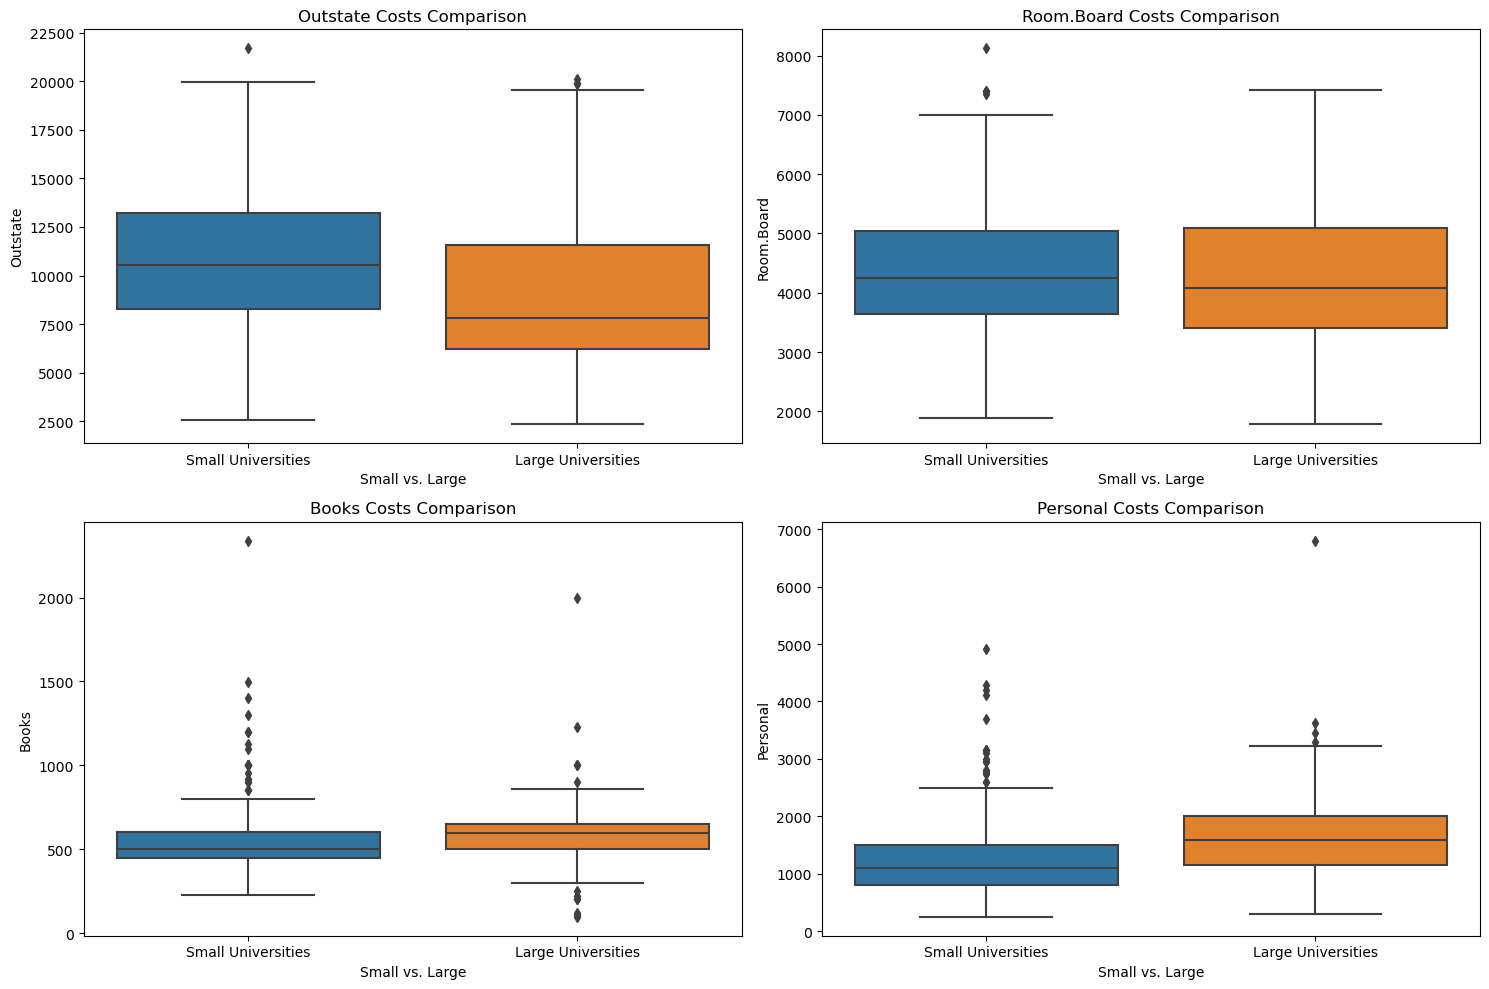

NameError: name 'average_costs' is not defined

In [15]:
# List of cost-related columns to plot
cost_columns = ['Outstate', 'Room.Board', 'Books', 'Personal']

# Create box plots for each cost-related variable
plt.figure(figsize=(15, 10))

for i, column in enumerate(cost_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Large_University', y=column, data=df)
    plt.xlabel('Small vs. Large')
    plt.ylabel(column)
    plt.title(f'{column} Costs Comparison')
    plt.xticks([0, 1], ['Small Universities', 'Large Universities'])

plt.tight_layout()
plt.show()

# Calculate the mean costs for large vs. small universities:
mean_costs = df.groupby('Large_University')[cost_columns].mean()

# Determine if large universities are more expensive
if average_costs.loc[True].sum() > average_costs.loc[False].sum():
    print("\nLarge universities are more expensive than small universities on average.")
else:
    print("\nSmall universities are more expensive than large universities on average.")
mean_costs

7. To further examine the relationship between the size of a university against its out-of-state tuition, plot a scatter plot. <b>Answer on Canvas: What type of relationship does this show (weak, medium, strong)?</b> Hint: Use the enrollment class size as a proxy for the size of a university.

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Enroll', y='Outstate', data=df)
plt.title('Scatter Plot of Enrollment Size vs. Out-of-State Tuition')
plt.xlabel('Enrollment Size')
plt.ylabel('Out-of-State Tuition')
plt.show()

# Calculate correlation to stablish relationship:
correlation = college_new['Enroll'].corr(college_new['Outstate'])
print(f"\nCorrelation between Enroll and Outstate: {correlation:.2f}")

8. Use `matplotlib.pyplot.hist()` or `seaborn.distplot()` to produce some histograms with different numbers of bins for a few of the quantitative variables. You may ﬁnd the `matplotlib.pyplot.subplot()` function useful to plot multiple graphs under a single codeblock. In particular, create a histogram to examine the number of applications received with a bin size of 200. <b>Answer on Canvas: Are there more universities that receive 0 to 10,000 applications or 10,000 to 20,000 applications?</b>

In [ ]:
# Choose quantitative variables:
variables = ["Apps", "Outstate", "Room.Board", "Personal"]  # Adjust as needed

# Define number of bins for each variable:
bins_dict = {"Apps": 200, "Outstate": 30, "Room.Board": 30, "Personal": 30}  # Adjust bin sizes

# Create subplots for multiple histograms:
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 5))  # Adjust layout

# Loop through variables and create histograms:
for i, variable in enumerate(variables):
    axes[i].hist(df[variable], bins=bins_dict[variable], edgecolor='blue') # Using matplotlib.pyplot.hist()
    axes[i].set_title(f"Histogram of {variable} (Bin size: {bins_dict[variable]})")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("Frequency")

# Adjust and display layout:
plt.tight_layout()
plt.show()

# Count the number of universities in each range of applications
num_universities_0_to_10k = df[(df['Apps'] >= 0) & (df['Apps'] <= 10000)].shape[0]
num_universities_10k_to_20k = df[(df['Apps'] > 10000) & (df['Apps'] <= 20000)].shape[0]

# Compare the counts
if num_universities_0_to_10k > num_universities_10k_to_20k:
    print("There are more universities that receive 0 to 10,000 applications.")
elif num_universities_0_to_10k < num_universities_10k_to_20k:
    print("There are more universities that receive 10,000 to 20,000 applications.")
else:
    print("There are an equal number of universities in both ranges.")

9. We are interested in the acceptance rate of these universities. To calculate the acceptance rate, we take the ‘Accept’ column and divide by the ‘Apps’ column. Add this column to a copied version of the original dataframe. Remember to copy the dataframe first before performing feature transformation, as we do not wish to alter or inadvertently create new columns in our original data. <b>Name your new column `acceptance_rate`. Answer on Canvas: Is there a positive or negative relationship between the university’s acceptance rate and the percentage of students in the university who graduated from the top 10% from high school?</b>

In [ ]:
# Create a copy of the original dataframe:
college_new = df.copy()

# Calculate the acceptance rate:
acceptance_rate = college_new['Accept'] / college_new['Apps']
college_new['Acceptance_Rate'] = acceptance_rate
college_new.head() # verify operation

In [ ]:
grader.grade(test_case_id = 'acceptance_rate_test', answer = acceptance_rate)

*You may plot the university’s acceptance rate vs the percentage of students in the university who graduated from the top 10% from high school.*

In [ ]:
# Plot the acceptance rate vs the percentage of students in the top 10% of high school class:
plt.figure(figsize=(10, 6))
plt.scatter(college_new['Acceptance_Rate'], college_new['Top10perc'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Top 10% of High School Class')
plt.title('Acceptance Rate vs. Top 10% of High School Class')
plt.grid(True)
plt.show()

# Calculate correlation to stablish relationship:
correlation = college_new['Acceptance_Rate'].corr(college_new['Top10perc'])
print(f"\nCorrelation between acceptance rate and percentage of top 10% students: {correlation:.2f}")

10. Continue exploring the data and provide a brief summary of what you discover.

In [ ]:
# From this analysis, we can conclude that there are significant differences between private and public universities 
# in terms of out-of-state tuition. Also, the correlation coefficient of -0.45 suggests a moderate negative relationship 
# between the acceptance rate and the percentage of students who graduated from the top 10% of their high school class. 
# This means that as the acceptance rate increases, the percentage of students from the top 10% of their high school 
# class tends to decrease, and vice versa.In other words, universities with lower acceptance rates (more selective universities) 
# tend to have a higher percentage of students who graduated from the top 10% of their high school class. This makes 
# sense intuitively, as more selective universities are likely to attract and admit students with stronger academic backgrounds.

## Part B

Next, let’s turn to the Boston housing dataset, which contains the following variables from 506 different towns in Boston collected by the US Census Service:

|Column |Description|
|:-|:-|
|CRIM | per capita crime rate by town|
|ZN | proportion of residential land zoned for lots over 25,000 sq.ft|
|INDUS | proportion of non-retail business acres per town|
|CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX | nitric oxides concentration (parts per 10 million)|
|RM | average number of rooms per dwelling|
|AGE | proportion of owner-occupied units built prior to 1940|
|DIS | weighted distances to five Boston employment centres|
|RAD | index of accessibility to radial highways|
|TAX | full-value property-tax rate per \$10,000|
|PTRATIO | pupil-teacher ratio by town|
|B | $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of African Americans by town|
|LSTAT | \% lower status of the population|
|MEDV | Median value of owner-occupied homes in \$1000's|

1. To begin, load the Boston dataset. We can fetch this dataset by calling sklearn’s API.

In [16]:
# from sklearn.datasets import load_boston
# boston_dataset = load_boston()
# boston = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
# boston['MEDV'] = pd.Series(boston_dataset.target)
# boston.head()

# Load the original dataset into a DataFrame:
boston = pd.read_csv('Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


2. Make pairwise scatterplots of some predictors (columns) in this dataset. Since this dataset includes many predictors, avoid using the `seaborn` `pairplot()` function with all the predictors to minimize run-time. Comment on your observations. 

In [19]:
# # Selecting a subset of predictors for visualization
# predictors = ['crim', 'rm', 'age', 'dis', 'medv']

# # Create pairwise scatterplots
# pd.plotting.scatter_matrix(boston[predictors], figsize=(12, 12))
# plt.show()


#data handling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

boston_dataset = load_boston ( )

X = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
y = pd.Series(boston_dataset.target) #medv column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("Length of X_train: ", len(X_train))


NameError: name 'load_boston' is not defined

3. Are any of the predictors associated with per capita crime rate?  If so, explain the relationship. <b>Answer on Canvas: Which predictor has the highest correlation with ‘CRIM’, besides ‘CRIM’ itself?<b>

In [ ]:
# Compute the correlation matrix:
correlation_matrix = boston.corr()

# Get the correlation values for 'CRIM':
crim_correlations = correlation_matrix["crim"].drop("crim")

# Find the predictor with the highest correlation with 'crim':
highest_corr_predictor = crim_correlations.abs().idxmax()
highest_corr_value = crim_correlations[highest_corr_predictor]

# Print the results:
print("Correlation of 'CRIM' with other predictors:")
print(crim_correlations)
print(f"\nPredictor with the highest correlation with 'CRIM': {highest_corr_predictor} ({highest_corr_value})")


kf = KFold(n_splits=11, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(len(train_index))
    print(len(test_index))

4. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor. <b>Answer on Canvas: Which town number has the highest crime rate? Which town number has the lowest tax rate? Which town number has the highest pupil-teacher ratio?</b> Hint: Name the variables `highest_crim`, `lowest_tax`, and `highest_pup` respectively. If there are multiple towns that share the same value, choose the first observation.

In [ ]:
# Find town with the highest crime rate:
highest_crim = boston['crim'].idxmax()

# Output the results:
print("Town with the highest crime rate:", highest_crim)

In [ ]:
grader.grade(test_case_id = 'highest_crim_test', answer = highest_crim)

In [ ]:
# Find town with the lowest tax rate:
lowest_tax = boston['tax'].idxmin()
print("Town with the lowest tax rate:", lowest_tax)

In [ ]:
grader.grade(test_case_id = 'lowest_tax_test', answer = lowest_tax)

In [ ]:
# Find town with the highest pupil-teacher ratio:
highest_pup = boston['ptratio'].idxmax()
print("Town with the highest pupil-teacher ratio:", highest_pup)

In [ ]:
grader.grade(test_case_id = 'highest_pup_test', answer = highest_pup)

5. Count the number of towns in this dataset that are bound to the Charles river and name this number as the variable `charles`. <b>Enter your answer on Canvas.</b>

In [ ]:
charles = boston['chas'].sum()
print("There are %s towns bound to the Charles River and %s that are not." % (charles, 506-charles))

In [ ]:
grader.grade(test_case_id = 'charles_test', answer = charles)

6. What is the median pupil-teacher ratio among the towns in this dataset? Name this number as the variable `med_pt`.<b> Enter your answer on Canvas.</b>

In [ ]:
med_pt = boston['ptratio'].median()
print("The median pupil-to-teacher ratio is %s." % med_pt)

In [ ]:
grader.grade(test_case_id = 'med_pt_test', answer = med_pt)

7. Which town of Boston has lowest median value of owner- occupied homes? Name this index as the variable `min_medv` and <b>enter your answer on Canvas</b>. If there are multiple towns with the same minimum median value, then choose the first such observation. What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your observations.

In [ ]:
min_medv = boston['medv'].idxmin()
print("The lowest median value of owner-occupied homes is town #%s." % min_medv)
boston.iloc[[min_medv]] # double brackets for Pandas dataframe

In [ ]:
grader.grade(test_case_id = 'min_medv_test', answer = min_medv)

8. In this data set, how many of the suburbs average more than eight rooms per dwelling? Name this number as the variable `num_rooms` and <b>enter your answer on Canvas</b>. Comment on the suburbs that average more than eight rooms per dwelling.

In [ ]:
num_rooms = (boston['rm'] > 8).sum()
print("Houses with more than eight rooms:", num_rooms)
boston['rm'].describe()

In [ ]:
grader.grade(test_case_id = 'num_rooms_test', answer = num_rooms)

*What other observations can you make from this dataset?*

## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.